In [11]:
import pandas as pd

df = pd.read_csv("filled_1.csv")
df

,province,year,age_group,method,myopia_rate_urban,myopia_rate_rural,method_1,weight,weighted_urban,weighted_rural,weight_rural,weight_urban
0,Tibet,1998,1,NaN,0.09480,0.03730,NaN,0.003423,0.000324,0.000128,0.003423,0.003423
1,Tibet,1999,1,NaN,0.09480,0.03730,NaN,0.003423,0.000324,0.000128,0.003423,0.003423
2,Tibet,2000,1,4,0.09480,0.03730,4,0.003423,0.000324,0.000128,0.003423,0.003423
3,Tibet,2001,1,NaN,0.11700,0.04755,NaN,0.003226,0.000377,0.000153,0.003226,0.003226
4,Tibet,2002,1,NaN,0.13920,0.05780,4,0.003226,0.000449,0.000186,0.003226,0.003226
...,...,...,...,...,...,...,...,...,...,...,...,...
2847,Chongqing,2016,4,NaN,0.78160,0.75948,NaN,0.019594,0.015315,0.014881,0.019594,0.019594
2848,Chongqing,2017,4,NaN,0.74685,0.77642,NaN,0.019594,0.014634,0.015213,0.019594,0.019594
2849,Chongqing,2018,4,1 or 3,0.71210,0.79336,1 or 3,0.019594,0.013953,0.015545,0.019594,0.019594
2850,Chongqing,2019,4,1 or 3,0.79575,0.81030,1 or 3,0.019594,0.015592,0.015877,0.019594,0.019594


In [12]:
filtered_df = df[df['year'].isin([1998, 2019])]
filtered_df
filtered_df.to_csv('filtered.csv', index=False)

In [13]:
df=pd.read_csv("diff.csv")
df

,province,age_group,myopia_diff_urban,myopia_diff_rural
0,Zhejiang,1,0.068667,0.11880
1,Zhejiang,2,0.261900,0.13465
2,Zhejiang,3,0.092167,0.02045
3,Zhejiang,4,0.048567,-0.07740
4,Yunnan,1,0.074700,-0.00200
...,...,...,...,...
119,Beijing,4,0.101100,0.35680
120,Anhui,1,-0.027600,0.08620
121,Anhui,2,0.179050,0.13780
122,Anhui,3,0.155050,0.06420


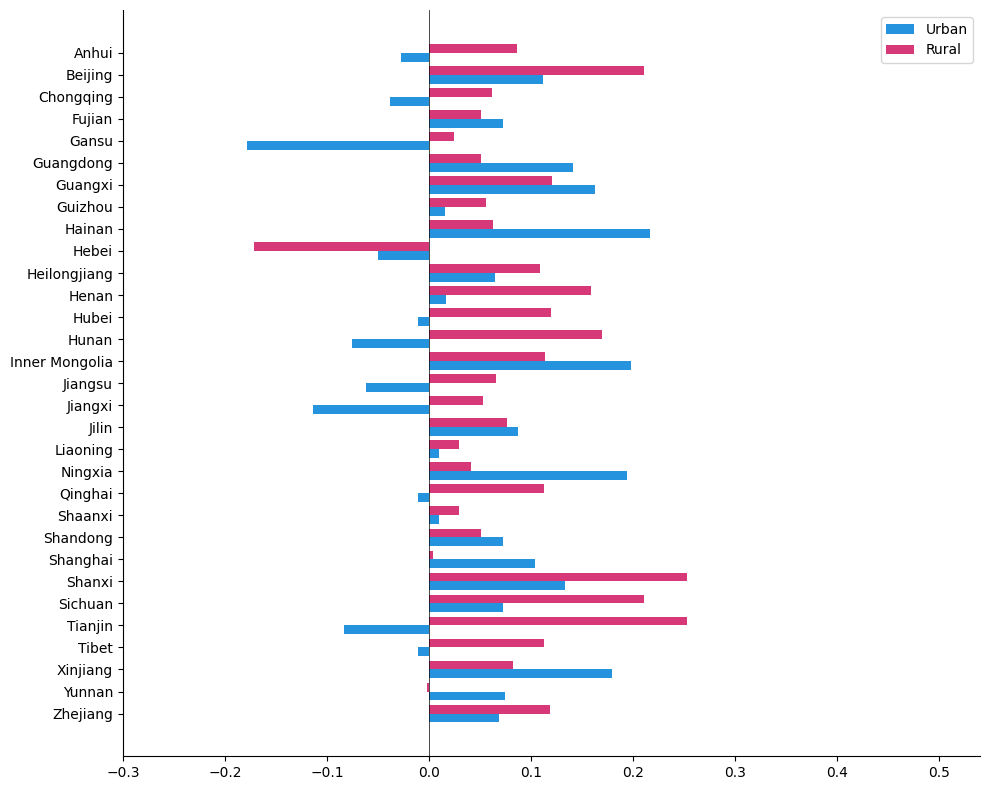

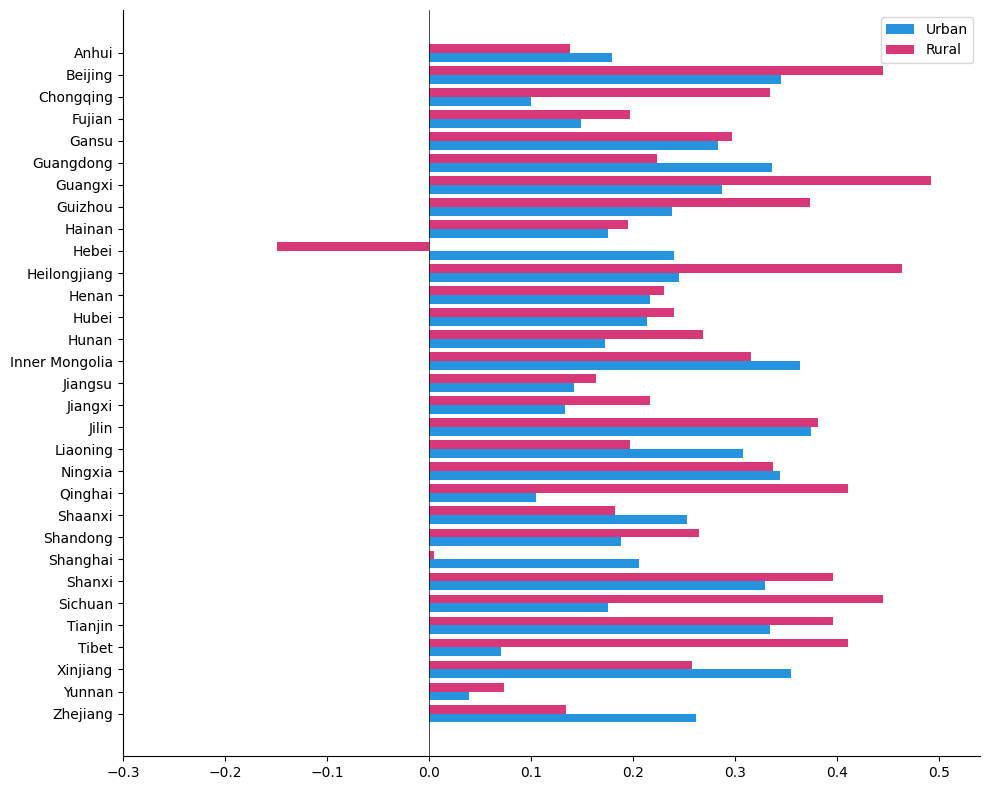

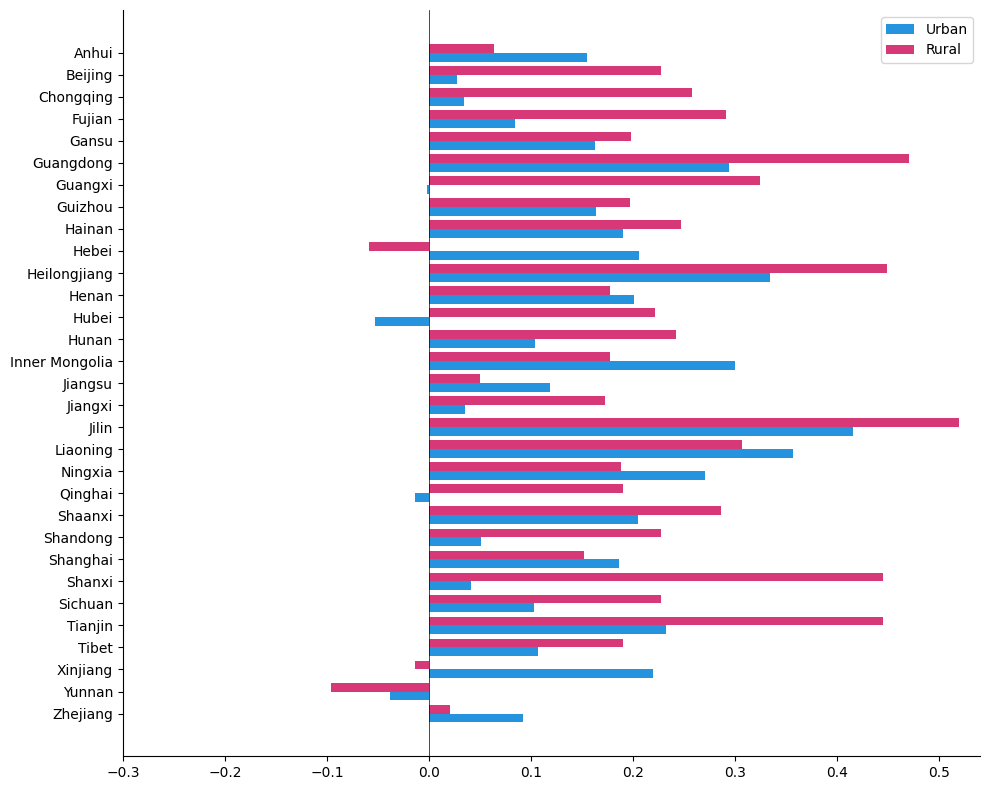

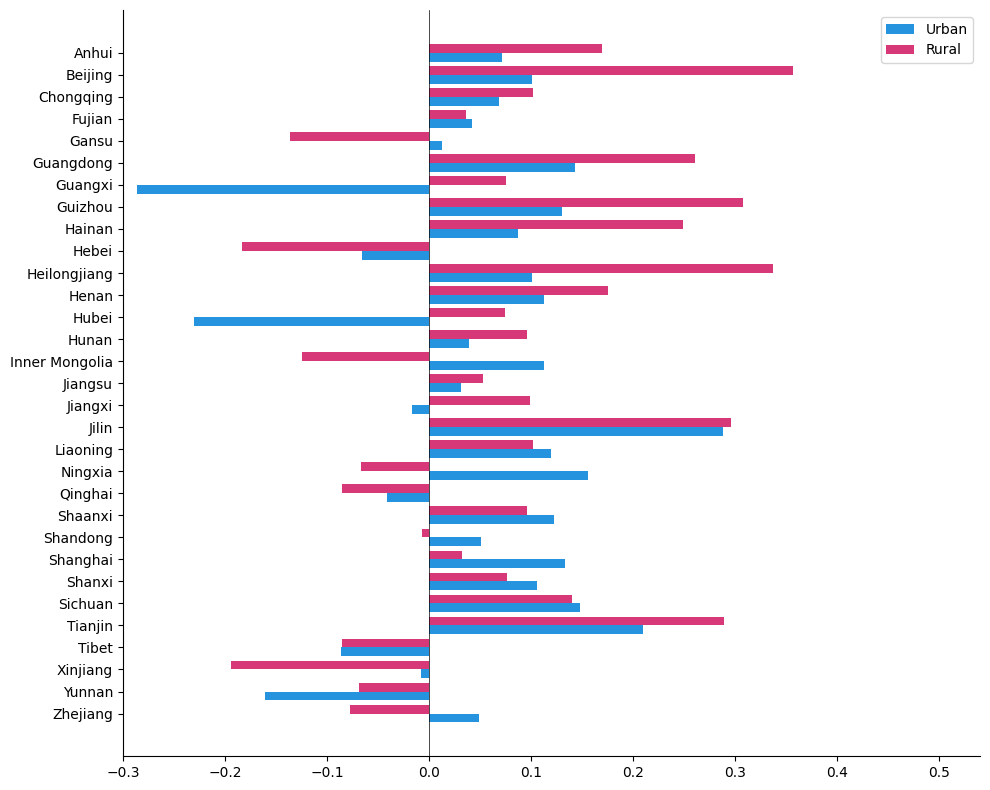

In [6]:
import matplotlib.pyplot as plt

for age_group in sorted(df['age_group'].unique()):
    current_data = df[df['age_group'] == age_group]
    plt.figure(figsize=(10, 8))
    provinces = current_data['province'].unique()
    urban_diffs = [current_data[current_data['province'] == province]['myopia_diff_urban'].values[0] for province in provinces]
    rural_diffs = [current_data[current_data['province'] == province]['myopia_diff_rural'].values[0] for province in provinces]
        
    spacing_factor = 1  # 调整这个因子以改变行间距
    y = [i * spacing_factor for i in range(len(provinces))]
    plt.barh(y, urban_diffs, height=0.4 * spacing_factor, label='Urban', color='#2593dd', align='center')
    plt.barh([p + 0.4 * spacing_factor for p in y], rural_diffs, height=0.4 * spacing_factor, label='Rural', color="#d73878", align='center')
    plt.yticks([p + 0.2 * spacing_factor for p in y], provinces)
    plt.legend()
    plt.xlim(-0.3, 0.54)
    plt.axvline(x=0, color='black',linewidth=0.5)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.tight_layout()
    plt.show()